In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Create a validation dataset from the training data
# Scale the data between 0 and 1 by dividing it by 255. as its an unsigned data between 0-255 range
print(X_train.shape)
X_valid = X_train[:5000] / 255
X_train = X_train[5000:] / 255
y_valid = y_train[:5000] / 255
y_train = y_train[5000:] / 255
X_test = X_test / 255
print(X_train.shape)

(60000, 28, 28)
(55000, 28, 28)


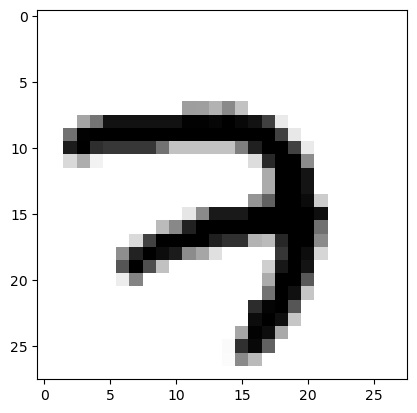

In [4]:
plt.imshow(X_train[0], cmap = 'binary')

<Axes: >

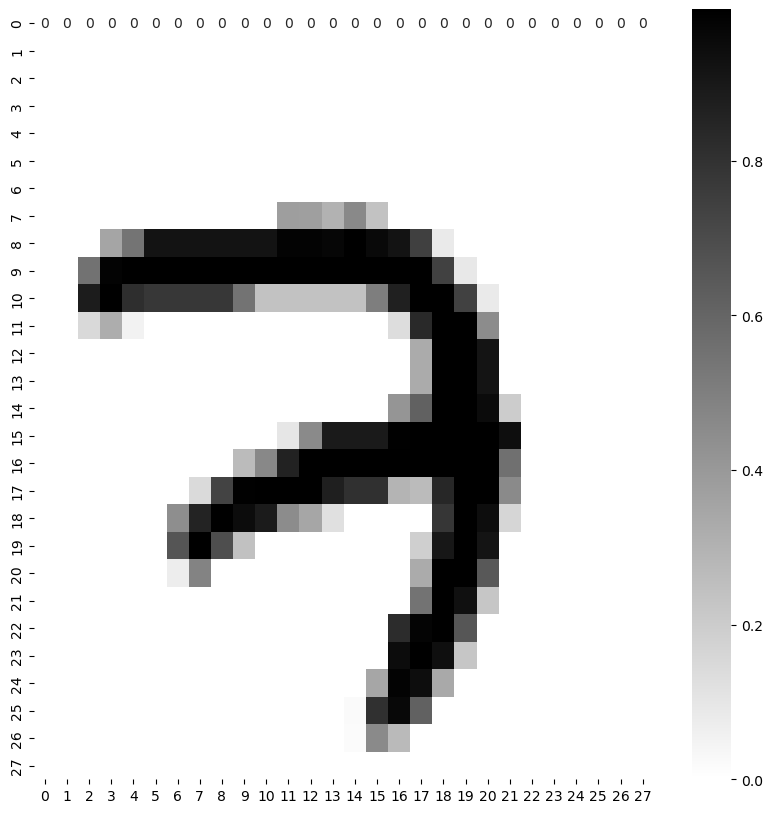

In [5]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

In [6]:
layer = tf.keras.layers
Layers = [layer.Flatten(input_shape = [28, 28], name = "inputLayer"), 
          layer.Dense(300, activation = "relu", name = "hiddenLayer1"),
          layer.Dense(100, activation = "relu", name = "hiddenLayer2"),
          layer.Dense(10, activation = "softmax", name = "outputLayer")]

model_clf = tf.keras.models.Sequential(Layers)
model_clf.summary()

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
hidden1 = model_clf.layers[1]
print("Hidden layer 1 Name : ", hidden1.name)

weights, biases = hidden1.get_weights()
print("Hidden layer 1 Weights and Biases: ", weights.shape, biases.shape)

Hidden layer 1 Name :  hiddenLayer1
Hidden layer 1 Weights and Biases:  (784, 300) (300,)


In [8]:
Loss_function = "sparse_categorical_crossentropy"
Optimizer = "SGD"
Metrics = ["accuracy"]

model_clf.compile(loss = Loss_function, optimizer = Optimizer, metrics = Metrics)

## Tensorboard Callback Function

In [13]:
log_folder = 'logs' # give a folder where i want to store logs
%load_ext tensorboard 
# load the extension of tensorboard so that perticular dashboard come
# !rm -rf logs <-- remove perticular logs 
tensor_board_cb = tf.keras.callbacks.TensorBoard(log_dir = log_folder, histogram_freq = 1)

## Early Stopping Callback Function

In [14]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5)

## Model Checkpointing Callback Function

In [15]:
CKPT_path = "Model_ckpt.keras"
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only = True)

In [16]:
Epochs = 10
Validation_Set = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = Epochs, 
                        validation_data = Validation_Set, batch_size = 32, 
                        callbacks = [tensor_board_cb, early_stopping_cb, checkpoint_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0970 - loss: 0.0787 - val_accuracy: 0.0958 - val_loss: 5.7200e-04
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0992 - loss: 4.9209e-04 - val_accuracy: 0.0958 - val_loss: 2.6230e-04
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0991 - loss: 2.4908e-04 - val_accuracy: 0.0958 - val_loss: 1.6694e-04
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0995 - loss: 1.7267e-04 - val_accuracy: 0.0958 - val_loss: 1.2139e-04
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0990 - loss: 1.2755e-04 - val_accuracy: 0.0958 - val_loss: 9.4865e-05
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0961 - loss: 1.0417e-04 - val_accuracy: 0.0958 - val_loss: 7.7595e-05
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0999 - loss: 8.3133e-05 - val_accuracy: 0.0958 - val_loss: 6.5488e-05
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━

In [20]:
%tensorboard --logdir = {log_folder}

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-05-25 18:20:24.111295: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-25 18:20:25.464296: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]

In [21]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs = 10, 
                        validation_data = Validation_Set, batch_size = 32, 
                        callbacks = [tensor_board_cb, early_stopping_cb, checkpoint_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0991 - loss: 5.2703e-05 - val_accuracy: 0.0958 - val_loss: 3.9868e-05
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0998 - loss: 4.3132e-05 - val_accuracy: 0.0958 - val_loss: 3.6241e-05
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1006 - loss: 4.0131e-05 - val_accuracy: 0.0958 - val_loss: 3.3200e-05
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0999 - loss: 3.7203e-05 - val_accuracy: 0.0958 - val_loss: 3.0612e-05
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0999 - loss: 3.5861e-05 - val_accuracy: 0.0958 - val_loss: 2.8389e-05
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1000 - loss: 3.3911e-05 - val_accuracy: 0.0958 - val_loss: 2.6453e-05
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1004 - loss: 3.0102e-05 - val_accuracy: 0.0958 - val_loss: 2.4758e-05
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━

In [22]:
ckpt_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.99975562e-01, 1.06584559e-06, 2.62402546e-06, ...,
        4.00946101e-06, 4.88013075e-06, 9.27325459e-07],
       [9.99999523e-01, 1.03516458e-08, 4.51685374e-08, ...,
        3.88084800e-08, 6.05101178e-08, 1.48365356e-08],
       [9.99837756e-01, 7.15716942e-06, 2.43120230e-05, ...,
        2.13527146e-05, 2.41057642e-05, 1.11399368e-05],
       ...,
       [1.00000000e+00, 1.36988658e-11, 2.59452182e-10, ...,
        1.09843884e-10, 1.48436041e-10, 2.77938679e-11],
       [1.00000000e+00, 2.48409626e-10, 3.81067355e-09, ...,
        1.86865456e-09, 2.98020075e-09, 5.83058601e-10],
       [1.00000000e+00, 5.33481625e-13, 1.32094726e-11, ...,
        3.20892835e-12, 1.04754157e-11, 9.35973412e-13]], dtype=float32)